<a href="https://colab.research.google.com/github/chuducthang77/Machine-Learning-tutorials-and-notes/blob/main/2_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1: XOR with Pytorch

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## Define constants and hyperparameter

In [2]:
epochs = 10000

## Dataset

Create an XOR dataset

In [3]:
# Define the XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

## Model

Create a neural network with 1 hidden layer (2 nodes).

In [4]:
# Define the neural network model
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # Input layer to hidden layer
        self.fc2 = nn.Linear(2, 1)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))  # Apply sigmoid activation to the hidden layer
        x = self.fc2(x)
        return x

In [5]:
# Instantiate the model
model = XORModel()

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


## Training

In [6]:
# Lists to store loss values during training
losses = []

# Training loop

for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)

    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

    losses.append(loss.item())  # Store the loss for plotting

Epoch [1000/10000], Loss: 0.2500944137573242
Epoch [2000/10000], Loss: 0.2495543360710144
Epoch [3000/10000], Loss: 0.24811650812625885
Epoch [4000/10000], Loss: 0.23630069196224213
Epoch [5000/10000], Loss: 0.014492676593363285
Epoch [6000/10000], Loss: 2.5608152043332666e-08
Epoch [7000/10000], Loss: 3.983657848039002e-11
Epoch [8000/10000], Loss: 3.983657848039002e-11
Epoch [9000/10000], Loss: 3.983657848039002e-11
Epoch [10000/10000], Loss: 3.983657848039002e-11


## Testing:

For those 4 points, predicts the label of those 4 points.

In [7]:
# Test the trained model
with torch.no_grad():
    test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    predictions = model(test_input)
    print("Predictions:")
    for i in range(len(test_input)):
        print(f"Input: {test_input[i].tolist()}, Output: {predictions[i].item()}")

Predictions:
Input: [0.0, 0.0], Output: 8.225440979003906e-06
Input: [0.0, 1.0], Output: 0.999993085861206
Input: [1.0, 0.0], Output: 0.9999942779541016
Input: [1.0, 1.0], Output: 3.337860107421875e-06


## Plotting

Plot the training loss

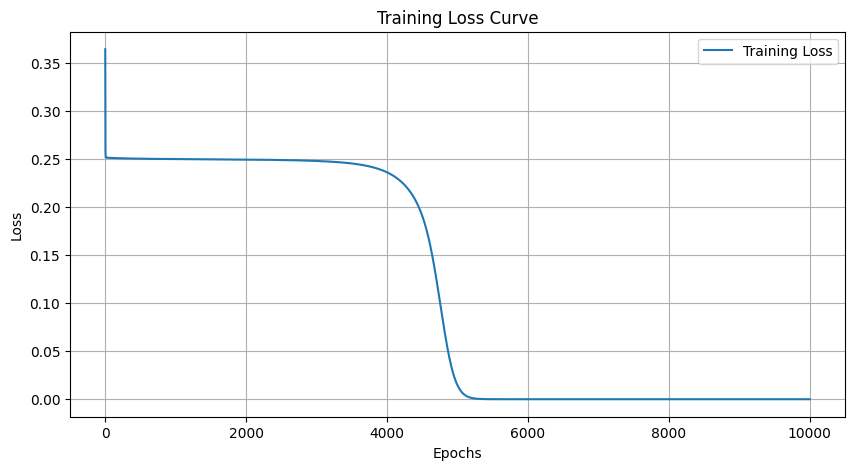

In [8]:
# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# Problem 2: MNIST with Pytorch

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt

## Define constants and hyperparameters

In [10]:
# Hyperparameters
batch_size = 64
learning_rate = 0.001
num_epochs = 10

## Datasets

Create a transformation pipeline (transform an image to scale (0, 1) and normalize). Load MNIST dataset and create dataloader for training and testing set.

In [11]:
# Data loading and preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

## Model

1 hidden layer with 2 nodes

In [12]:
# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [13]:
# Initialize model, create loss and optimizer
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## Training:

For each epoch and each batch, we will predict the class of those images. Then we calculate the loss and optimize the weight of the model.

In [14]:
# Lists to store loss values during training
train_losses = []

# Training loop
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        train_losses.append(loss.item())


Epoch [1/10], Step [100/938], Loss: 0.6398
Epoch [1/10], Step [200/938], Loss: 0.1863
Epoch [1/10], Step [300/938], Loss: 0.5098
Epoch [1/10], Step [400/938], Loss: 0.4638
Epoch [1/10], Step [500/938], Loss: 0.5160
Epoch [1/10], Step [600/938], Loss: 0.3077
Epoch [1/10], Step [700/938], Loss: 0.3368
Epoch [1/10], Step [800/938], Loss: 0.2091
Epoch [1/10], Step [900/938], Loss: 0.2416
Epoch [2/10], Step [100/938], Loss: 0.1214
Epoch [2/10], Step [200/938], Loss: 0.1435
Epoch [2/10], Step [300/938], Loss: 0.2663
Epoch [2/10], Step [400/938], Loss: 0.1534
Epoch [2/10], Step [500/938], Loss: 0.1454
Epoch [2/10], Step [600/938], Loss: 0.2037
Epoch [2/10], Step [700/938], Loss: 0.4734
Epoch [2/10], Step [800/938], Loss: 0.1008
Epoch [2/10], Step [900/938], Loss: 0.0947
Epoch [3/10], Step [100/938], Loss: 0.0780
Epoch [3/10], Step [200/938], Loss: 0.1830
Epoch [3/10], Step [300/938], Loss: 0.3760
Epoch [3/10], Step [400/938], Loss: 0.1469
Epoch [3/10], Step [500/938], Loss: 0.1425
Epoch [3/10

## Testing
For the test set, use the trained model to predict the label of the image. Then, calculate the accuracy, recall and f1 on the test set.

In [15]:
# Test the model
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted.numpy())

In [16]:
# Calculate accuracy, recall, and F1-score
accuracy = accuracy_score(y_true, y_pred)
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f'Accuracy on the test set: {accuracy:.4f}')
print(f'Recall on the test set: {recall:.4f}')
print(f'F1-score on the test set: {f1:.4f}')

Accuracy on the test set: 0.9768
Recall on the test set: 0.9768
F1-score on the test set: 0.9768


## Plotting

Plot the training loss for each iteration.

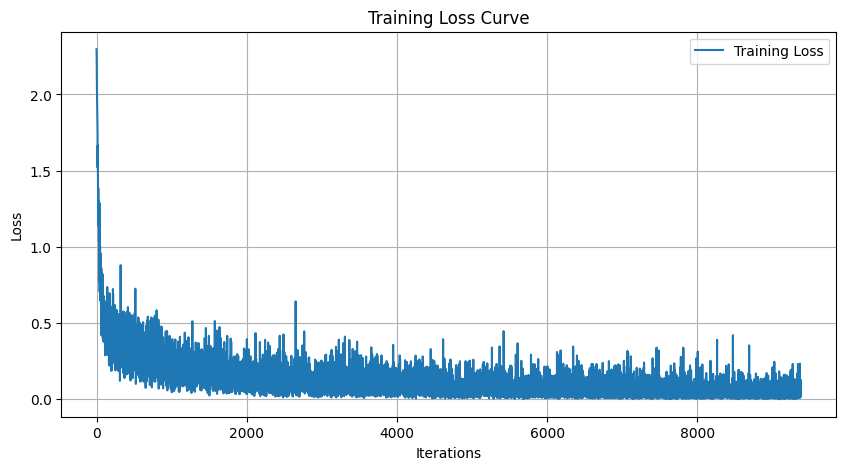

In [17]:
# Plot the loss curve
plt.figure(figsize=(10, 5))
plt.plot(range(len(train_losses)), train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.title('Training Loss Curve')
plt.show()

# Problem 3: Exponential function in softmax:
- Comes from the formulation of multinomial classification
- Related concept: Maximum likelihood, Exponential family distribution, multinomial distribution
- Other acceptable answer: non-negative output, normalization, numerical stabilization, easy derivation.

Refer to this [link](http://www2.stat.duke.edu/~sayan/Sta613/2018/lec/lec_jan24.pdf) or this [link](https://www.cs.princeton.edu/courses/archive/spr09/cos513/scribe/lecture11.pdf) if the explanation is still unclear.

[Youtube link](https://www.youtube.com/watch?v=eo7iEU-yc1g&ab_channel=statisticsmatt) also has a good explanation